In [15]:
# Read all the indivual csv files for tests into 1 dataframe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import glob
warnings.filterwarnings('ignore')

path = '../output' # use your path

all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    if filename != ('../output\sample_output.csv'):
        df = pd.read_csv(filename)
        df['filename'] = filename
        li.append(df)
frame = pd.concat(li, axis=0, ignore_index=False)
frame.columns = [c.replace(' ', '_') for c in frame.columns]
frame=frame.replace({'filename' : { '../output\\test_2_output.csv' : '2',
                                             '../output\\test_3_output.csv' : '3',
                                             '../output\\test_4_output.csv' : '4',
                                             '../output\\test_5_output.csv' : '5',                            
                                             '../output\\test_6_output.csv' : '6',                            
                                             '../output\\test_7_output.csv' : '7',
                                             '../output\\test_8_output.csv' : '8',
                                              '../output\\test_9_output.csv' : '9',                                  
                                             '../output\\test_11_output.csv' : '11',
                                             '../output\\test_12_output.csv' : '12',
                                             '../output\\test_14_output.csv' : '14',                                   
                                             '../output\\test_15_output.csv' : '15'}})
frame

,Review_ID,Actual_Dishname,Actual_Sentiment,Predicted_Dishname,Predicted_Sentiment,Categorical_Predicted_Sentiment_,ARI,Coleman-Liau,DaleChallIndex,FleschReadingEase,GunningFogIndex,Kincaid,LIX,RIX,SMOGIndex,Dish_extraction_recall,Sentiment_extraction_recall,filename
0,rk-samIemAo7OMtg0sv6Ww,SPICY CHICKEN CHIPOTLE PASTA,1,NaN,-100,NaN,70.525510,7.037338,14.257564,-45.961837,61.793197,56.188980,161.965986,22.0,21.165902,0.000000,0.000000,11
1,67AJxZVfpOrciLTbu2bItg,"BISTRO SHRIMP PASTA,GRILLED RIB-EYE STEAK,AVOC...","-1,-1,1",BISTRO SHRIMP PASTA,"0.25,-100,-100","1,nan,nan",121.082694,9.061798,19.655439,-150.611429,101.755102,95.131429,258.877551,34.0,29.267851,0.333333,0.000000,11
2,fJgti_kJGi-VO2KL2oqB_g,LOUISIANA CHICKEN PASTA,-1,LOUISIANA CHICKEN PASTA,-0.4166666666666667,-1,45.667216,7.110491,11.866154,3.720206,41.274227,36.837938,111.432990,14.0,16.416408,1.000000,1.000000,11
0,OEBkY-R2xcEbAbXW4gGPPA,"WINE,BAJA CHICKEN TACOS,CHICKEN ENCHILADAS","1,1,1",NaN,"-100,-100,-100","nan,nan,nan",56.262672,8.527993,12.112514,-15.196379,49.158621,44.196552,128.931034,15.0,18.491933,0.000000,0.000000,12
1,M2umkqcbnwCu8Mr8p2_Pvg,BRIOCHE BREAKFAST SANDWICH,None,NaN,-100,NaN,177.896953,7.620353,25.697363,-261.990526,147.391690,139.484211,374.573407,49.0,31.460499,0.000000,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,xmCrLP3kU29OjJG3cebyzg,"EVELYN'S FAVORITE PASTA,PORK BELLY SLIDERS","1,1",EVELYN'S FAVORITE PASTA,"0.0,-100","1,nan",66.950563,5.688313,14.793996,-30.831620,59.898592,52.836479,154.676056,18.0,21.165902,0.500000,0.500000,../output\test_sample_output.csv
1,V4hQvM3QAXQtsiWQGfk3eg,FRIED CHICKEN AND WAFFLES,-1,NaN,-100,NaN,51.910000,7.447157,11.215836,-3.146789,45.801835,40.776881,125.513761,18.0,16.416408,0.000000,0.000000,../output\test_sample_output.csv
2,pRVlorwxAi4MwsXS2x-P3A,"Fresh strawberry cheesecake,CHOCOLATE HAZELNUT...","1,1,1","Fresh strawberry cheesecake,CHOCOLATE HAZELNUT...","0.0,0.07777777777777777,-100","1,1,nan",98.217879,9.826082,17.444674,-104.371364,83.644444,77.005758,218.707071,41.0,28.690465,0.666667,0.666667,../output\test_sample_output.csv
3,8odiqHoDLOm5lJ0VhpFzqA,"FACTORY CREATE AN OMELETTE,FAMOUS FACTORY MEAT...","1,1,1,1",FAMOUS FACTORY MEATLOAF,"-100,0.2,-100,-100","nan,1,nan,nan",96.327990,9.960461,16.921529,-100.403866,82.342268,75.458660,214.103093,39.0,29.267851,0.250000,0.250000,../output\test_sample_output.csv


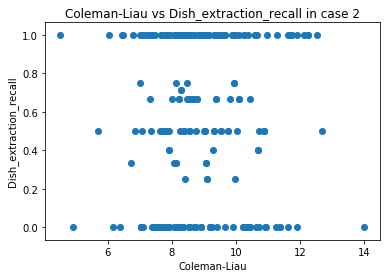

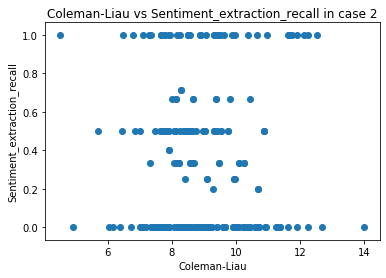

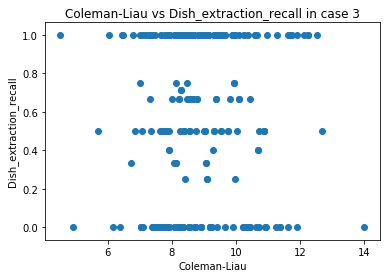

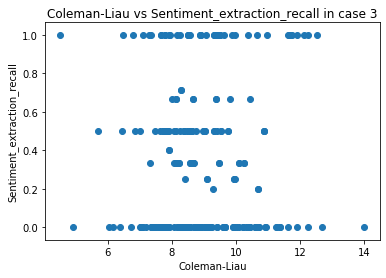

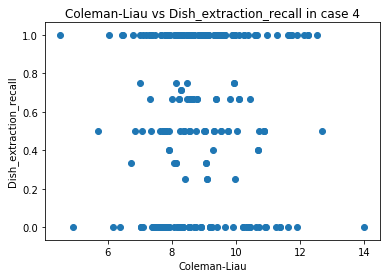

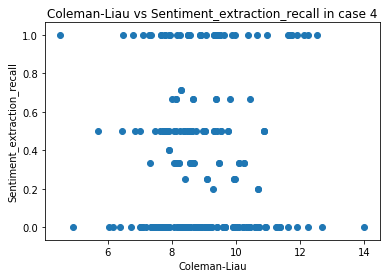

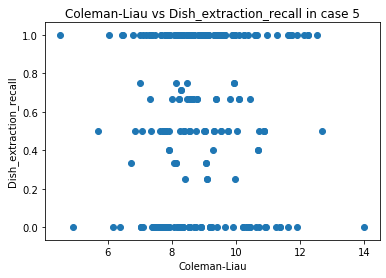

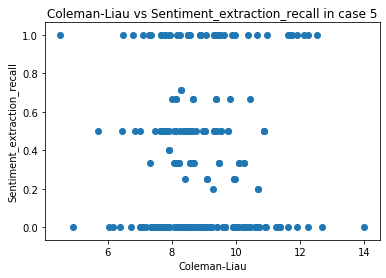

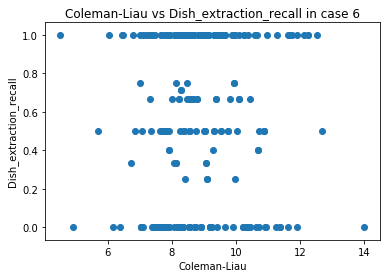

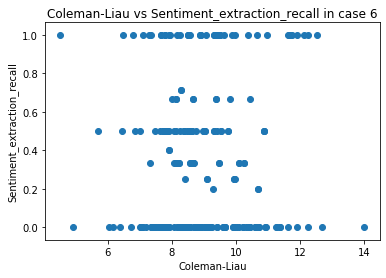

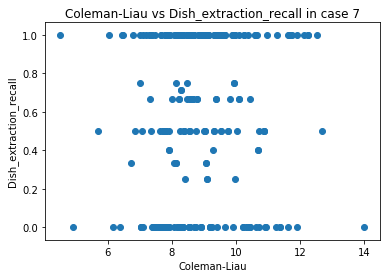

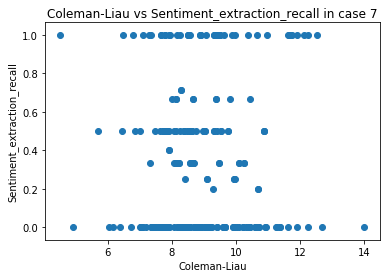

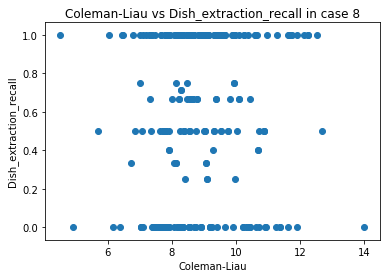

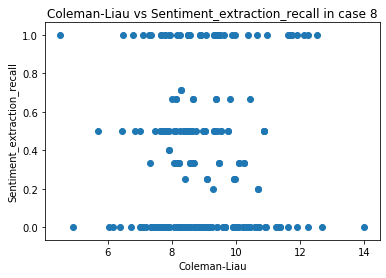

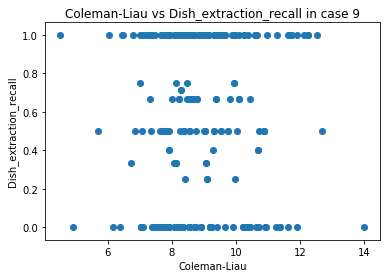

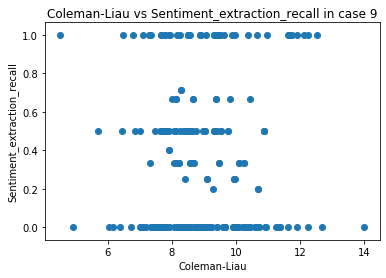

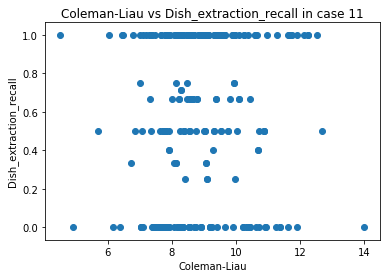

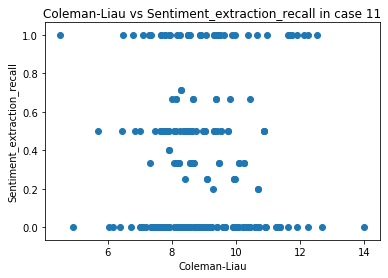

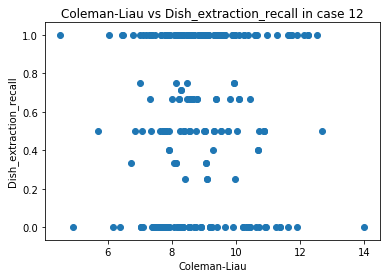

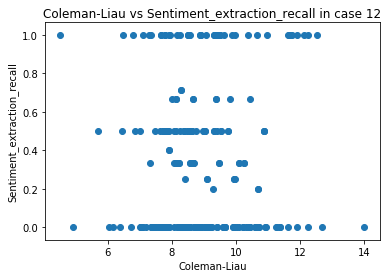

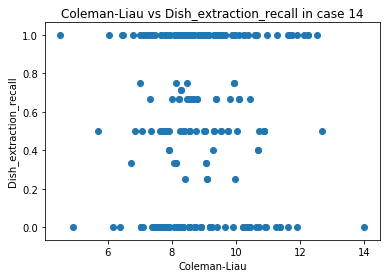

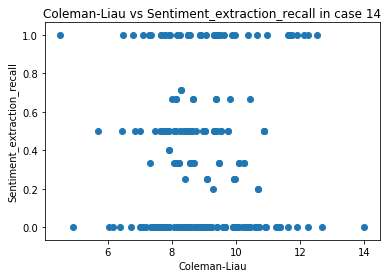

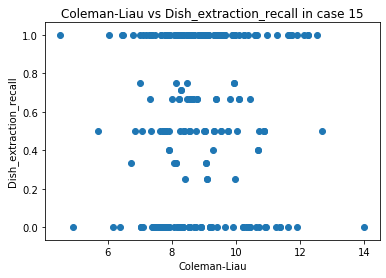

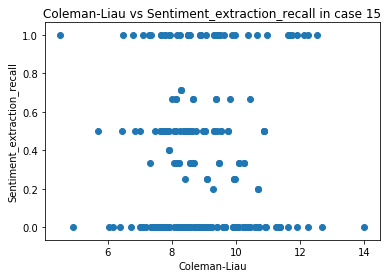

In [16]:
#Scatter plot for grammaticality score vs recall for individual cases
x_columns = ["Coleman-Liau"]
y_columns = ["Dish_extraction_recall",'Sentiment_extraction_recall']
z_columns =['2','3','4','5','6','7','8','9','11','12','14','15']

for z_col in z_columns:
    for x_col in x_columns:
        for y_col in y_columns:
            figure = plt.figure
            ax = plt.gca()
            ax.scatter(frame[x_col], frame[y_col])
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title("{} vs {} in case {}" .format(x_col, y_col,z_col))
            plt.show()

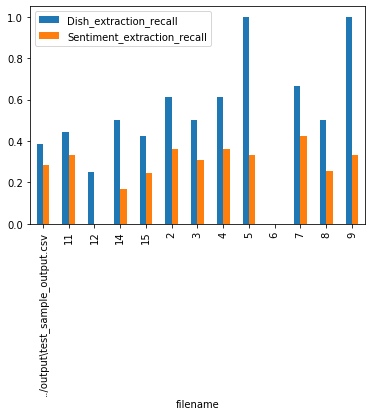

In [17]:
#Comparison of sentiment recall , dish recall and total numbers across all the cases
grouped_frame=frame.groupby(['filename']).agg({   
         'Dish_extraction_recall':'mean',    # mean per group
         'Sentiment_extraction_recall': 'mean' ,  # mean per group
         'filename': 'count'   # count per group 
          })
grouped_frame=grouped_frame.rename(columns={'filename':'Total_Numbers'})
grouped_frame.reset_index(level=0, inplace=True)
grouped_frame.plot(x="filename", y=["Dish_extraction_recall", "Sentiment_extraction_recall"], kind="bar")

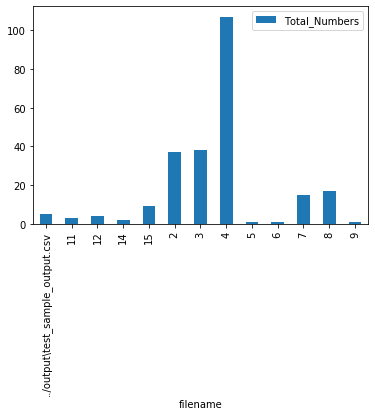

In [18]:
grouped_frame.plot(x="filename", y="Total_Numbers", kind="bar")